Project Title: Loan Status Prediction

Group Number: Group 17

Student Names and Registration Numbers:
1.   Isuranda M.A.K  : EG/2019/3607
2.   Malkith A.V.A   : EG/2019/3664
  

In [12]:
# Import the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Supress future warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# loading the dataset to pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Group17_Loan Status Prediction /Group17_Loan Status Prediction .csv')

In [15]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# Print the sape of the dataframe
df.shape

(614, 13)

In [17]:
# Print a concise summary of the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Data Preprocessing and EDA**

---





1.   Handling the Null/Missing Values




In [216]:
# number of missing values in each column
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [19]:
from sklearn.impute import SimpleImputer
from scipy.stats import skew

# Calculate skewness
loan_amount_skewness = skew(df['LoanAmount'].dropna())
print(f'Skewness of LoanAmount: {loan_amount_skewness}')

# Choose imputation strategy based on skewness
if -0.5 <= loan_amount_skewness <= 0.5:
    imputer = SimpleImputer(strategy='mean')
else:
    imputer = SimpleImputer(strategy='median')

# Apply the chosen imputer
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])

# Mode imputation for categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
imputer_mode = SimpleImputer(strategy='most_frequent')

# Iterate over categorical columns and impute missing values
for column in categorical_columns:
    df[column] = imputer_mode.fit_transform(df[[column]]).ravel()

# Check the DataFrame after imputation
print(df.isnull().sum())

Skewness of LoanAmount: 2.6707625615651294
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
# Print the sape of the dataframe
df.shape

(614, 13)

Text(0.5, 1.0, 'Distribution of Loan Statuses in Loan Dataset')

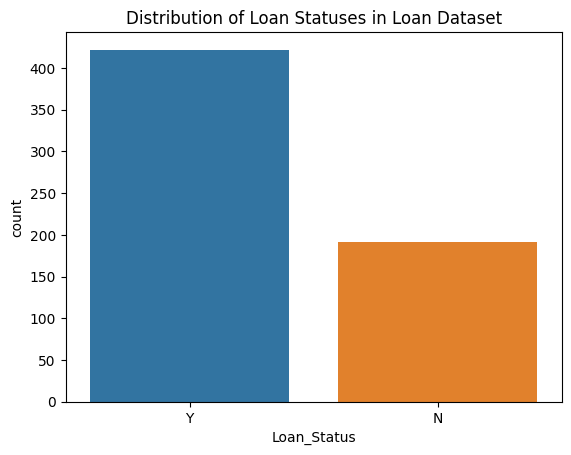

In [219]:
# Create a countplot to visualize loan status distribution
sns.countplot(x='Loan_Status', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses in Loan Dataset")

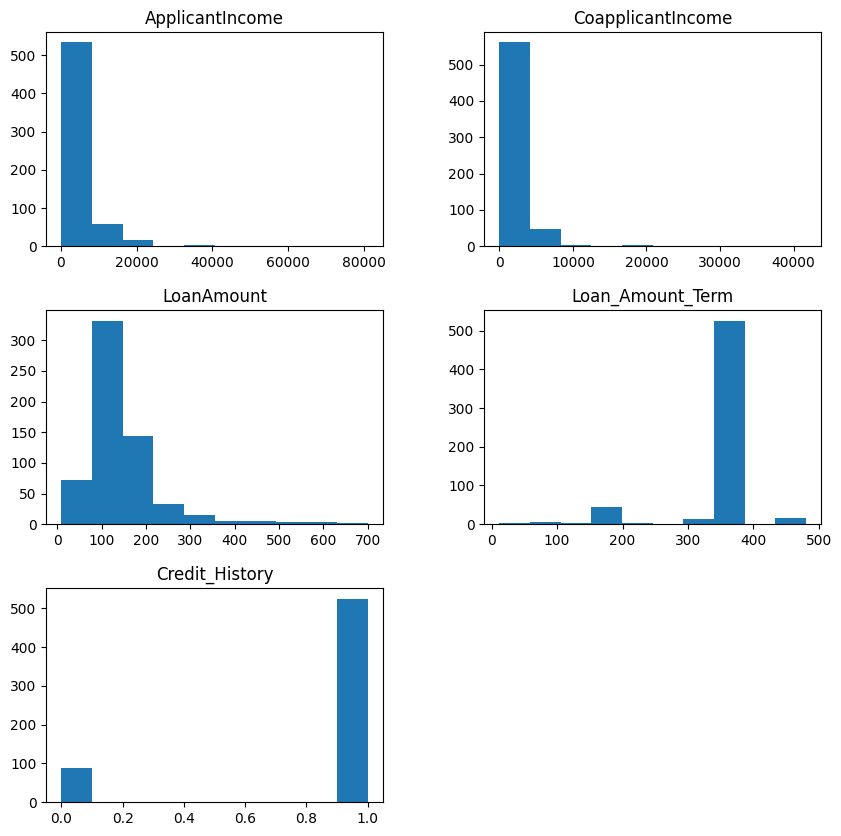

In [ ]:
# Create histograms for numerical features in loan_dataset
columns_to_plot = df.columns[:-1]  # Exclude the last column
df[columns_to_plot].hist(figsize=(10, 10), grid=False)
plt.show()

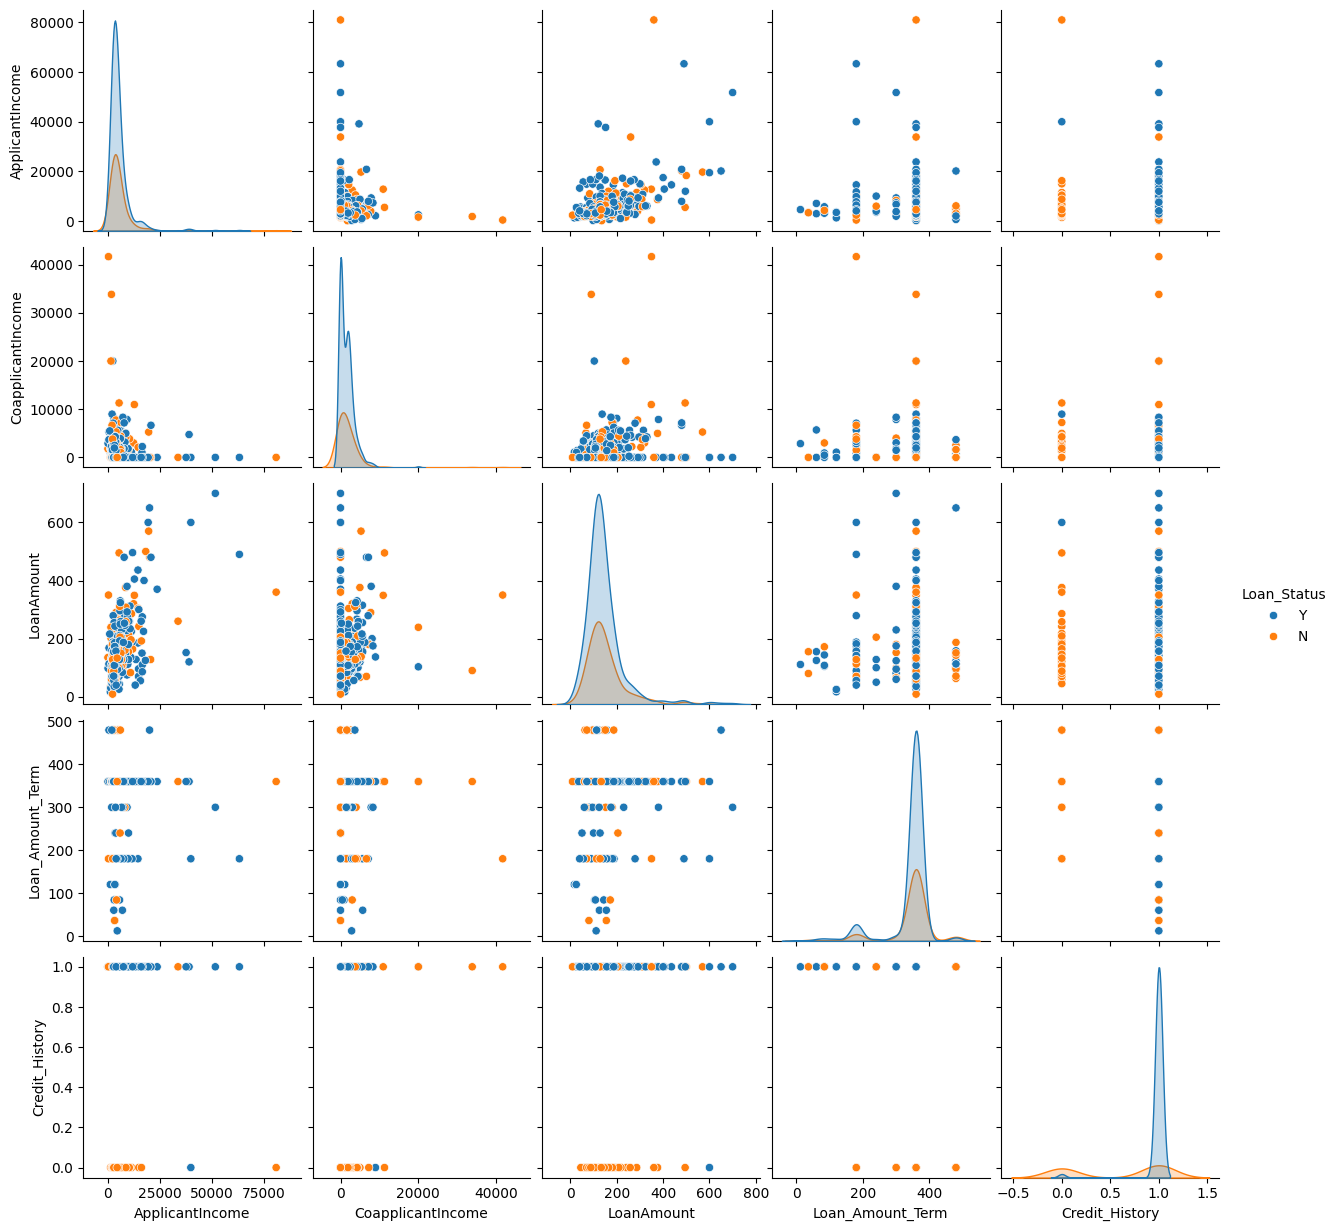

In [ ]:
# Bivariate Analysis (Numerical Features)
sns.pairplot(df, hue="Loan_Status")
plt.show()



2.   Handling Categorical Variables: Label Encoding




In [20]:
# Dependent column values
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [21]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [22]:
# Recheck the dependent values
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Distribution of Loan Statuses by Education Level')

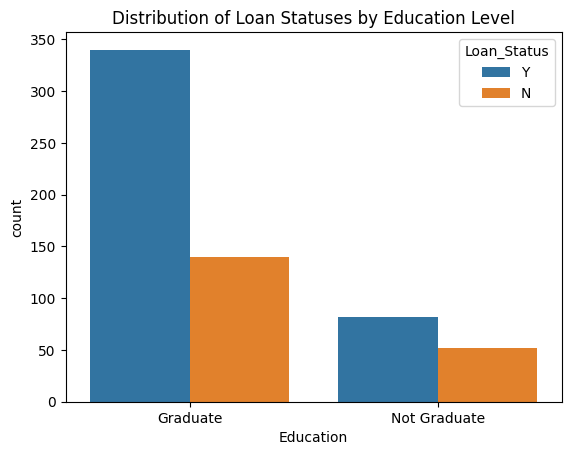

In [ ]:
# Create a countplot to visualize loan status distribution by education level
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses by Education Level")

Text(0.5, 1.0, 'Distribution of Loan Statuses by Property Area')

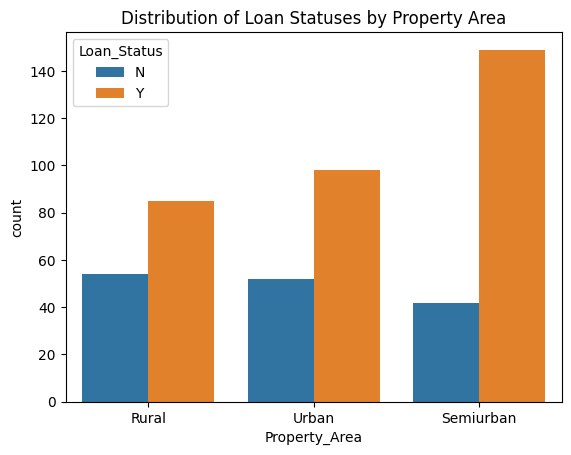

In [ ]:
# Create a countplot to visualize loan status distribution by property area
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses by Property Area")

In [24]:
# columns to be label encoded
columns_to_encode =['Married','Gender','Self_Employed','Loan_Status','Education']

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [26]:
#Recheck the Label Encoding
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


2.Handling Categorical Variables : One-Hot Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

# List the categorical features
cat_feature = ['Property_Area']

# Define custom category names
custom_categories = [['SemiUrban', 'Urban', 'Rural']]

# Define the encoder without drop='first' and with custom categories
transformer = make_column_transformer(
    (
        OneHotEncoder(categories=custom_categories, handle_unknown='ignore', dtype=np.int64, sparse_output=False),
        cat_feature
    )
)

# Encode the training features
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=['SemiUrban', 'Urban', 'Rural'])  # Custom column names
transformed_df.index = df.index
df = pd.concat([df, transformed_df], axis=1)
df.drop(cat_feature, axis=1, inplace=True)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0


In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'SemiUrban',
       'Urban', 'Rural'],
      dtype='object')

3. between features and the label

In [29]:
df= df.drop(columns=['Loan_ID'],axis=1)
df.corr()['Loan_Status']

,Loan_Status
Gender,0.017987
Married,0.091478
Dependents,0.002474
Education,-0.085884
Self_Employed,-0.003700
ApplicantIncome,-0.004710
CoapplicantIncome,-0.059187
LoanAmount,-0.033214
Loan_Amount_Term,-0.022549
Credit_History,0.540556


In [92]:
df_copy=df.copy()

In [93]:
df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0




4.   Train-Test Split



In [94]:
# Seperate the independent and dependent variables
X = df_copy.drop(columns=['Loan_Status'],axis=1)
Y = df_copy.Loan_Status

In [70]:
X.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,1,0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,0,1,0
613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,0,0,0


In [95]:
Features=X.columns
Features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'SemiUrban', 'Urban', 'Rural'],
      dtype='object')

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [22]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
83,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,0,0,0
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,0,0,0
227,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,0,0,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,0,0,0
464,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,0,0,0


In [97]:
df_train=np.concatenate((x_train,y_train.values.reshape(-1,1)),axis=1)
df_test=np.concatenate((x_test,y_test.values.reshape(-1,1)),axis=1)

In [98]:
df_train=pd.DataFrame(df_train,columns=Features.tolist()+['Loan_Status'])
df_test=pd.DataFrame(df_test)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural,Loan_Status
0,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,0,0,0,0
1,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,0,0,0,1
2,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,0,0,0,1
3,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,0,0,0,1
4,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,0,0,0,0


In [99]:
df_trainCopy=df_train.copy()

5. Detect Outliers (since data distribution is not a normal distribution we cannot use z score method detect outliers. We used winsorization technique)

In [100]:
winsorizationFeatures=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
winsorizationFeatures

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [101]:
from scipy import stats

In [102]:
def percentile_capping(df, cols, from_low_end, from_high_end):

    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [103]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(df_trainCopy, winsorizationFeatures, 0.01, 0.01)

In [59]:
df_train.shape

(491, 14)

In [60]:
df_trainCopy.shape

(491, 14)

Text(0, 0.5, 'Count')

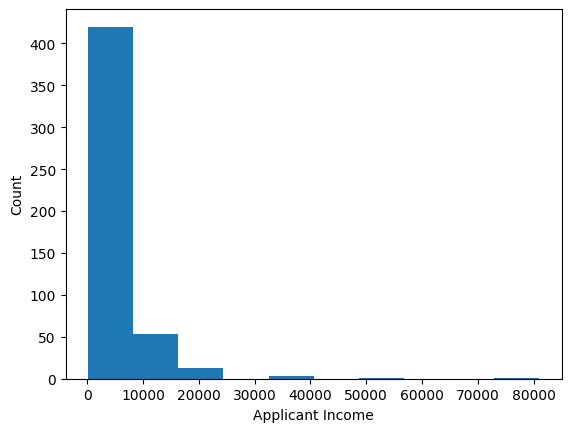

In [104]:
#Visualize the outliers in ApplicationIncome column
plt.hist(df_train['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

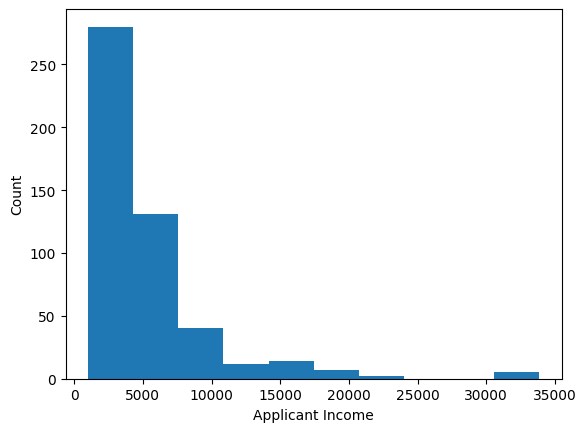

In [105]:
#Visualize the capping technique in ApplicationIncome column
plt.hist(df_trainCopy['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Count')

6.   Feature Scaling : Standard Scaling

In [106]:
# Standard Scale the numerical features
from sklearn.preprocessing import StandardScaler
num_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
st = StandardScaler()
df_trainCopy[num_features] = st.fit_transform(df_trainCopy[num_features])
x_test[num_features] = st.transform(x_test[num_features])

Save the scaler for web application

In [131]:
# Save the scaler
with open('scaler.pickle', 'wb') as file:
    pickle.dump(st, file)

In [107]:
# Seperate the independent and dependent variables
X_train = df_trainCopy.drop(columns=['Loan_Status'],axis=1)
Y_train = df_trainCopy['Loan_Status']

In [65]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
0,1,1,0,0,0,0.139634,0.354836,1.460368,0.287611,1.0,0,0,0
1,1,1,0,0,0,-0.520854,0.676651,-0.198617,0.287611,1.0,0,0,0
2,1,1,2,0,0,0.193915,0.080056,0.779441,0.287611,1.0,0,0,0
3,1,1,0,0,0,-0.710836,0.800426,-0.235759,0.287611,1.0,0,0,0
4,1,0,0,0,0,-0.258569,-0.759138,-0.607173,0.287611,0.0,0,0,0


In [57]:
y_train.head()

,Loan_Status
0,0
1,1
2,1
3,1
4,0


7. Balancing the unbalance dataset

<Axes: xlabel='Loan_Status'>

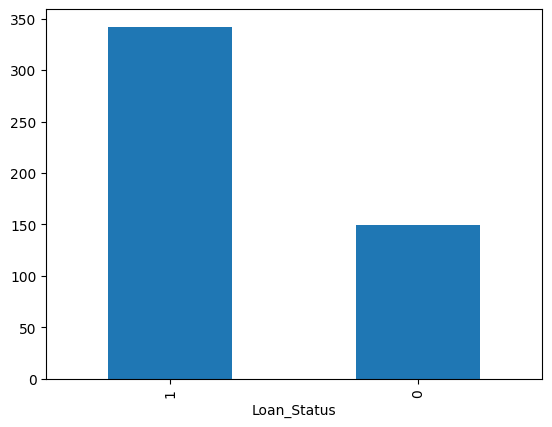

In [108]:
y_train.value_counts().plot(kind='bar')

In [59]:
!pip install --upgrade imbalanced-learn

In [109]:
Y_train = pd.DataFrame(Y_train,columns=['Loan_Status'])

In [110]:
print(type(y_train))
print(y_train[:5])

<class 'pandas.core.series.Series'>
83     0
90     1
227    1
482    1
464    0
Name: Loan_Status, dtype: int64


In [111]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

<Axes: xlabel='Loan_Status'>

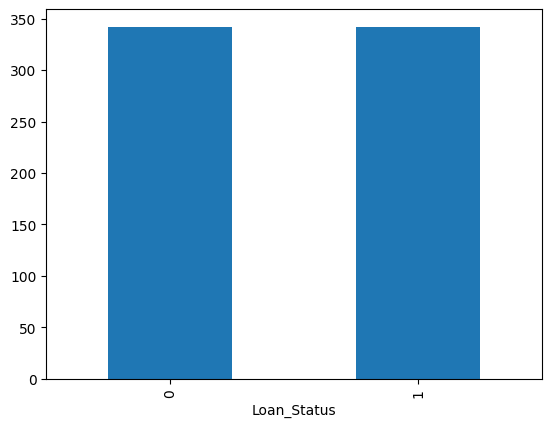

In [112]:
y_train.value_counts().plot(kind='bar')

**Train the Model on SVM classifier**

In [113]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

**Evaluate the Model**

In [126]:
#Accuracy on both train and test data
y_pred=model.predict(x_test)
y_train_pred=model.predict(X_train)
print(f'model trainig accuracy is {accuracy_score(y_train, y_train_pred)}')
print(f'model testing accuracy is {accuracy_score(y_test,y_pred)}')

model trainig accuracy is 0.72953216374269
model testing accuracy is 0.7886178861788617


In [115]:
# Precision on test data
precision = precision_score(y_test, y_pred)
print("Precision on test data:", precision)

Precision on test data: 0.7596153846153846


In [116]:
# Recall on testing data
recall = recall_score(y_test, y_pred)
print("Recall on test data:", recall)

Recall on test data: 0.9875


In [117]:
# F1 Score on testing data
f1 = f1_score(y_test, y_pred)
print("F1 Score on test data:", f1)

F1 Score on test data: 0.8586956521739131


In [127]:
# Confusion Matrix on testing data
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 25]
 [ 1 79]]


Hyperparameter Tuning of SVM

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],  # Used for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0],  # Used for 'poly' and 'sigmoid' kernels
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

In [ ]:
# accuracy score on training data
# Evaluate the model
X_train_prediction = grid_search.predict(X_train)
training_data_accuray = grid_search.score(X_train,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Get the pickle file of the most performed model for web application

In [130]:
import pickle
with open('predictor.pickle','wb') as file:
  pickle.dump(model,file)

**Train the Model on Random Forest classifier**

In [118]:
#Training the model using Random Forest classifier
classifierRF = RandomForestClassifier(n_estimators=100)

In [120]:
classifierRF.fit(X_train,y_train)

RandomForestClassifier()

In [128]:
#Accuracy on both train and test data
y_pred=classifierRF.predict(x_test)
y_train_pred=classifierRF.predict(X_train)
print(f'model trainig accuracy is {accuracy_score(y_train, y_train_pred)}')
print(f'model testing accuracy is {accuracy_score(y_test,y_pred)}')

model trainig accuracy is 1.0
model testing accuracy is 0.7642276422764228


In [122]:
# Precision on test data
precision = precision_score(y_test, y_pred)
print("Precision on test data:", precision)

Precision on test data: 0.7575757575757576


In [123]:
# Recall on testing data
recall = recall_score(y_test, y_pred)
print("Recall on test data:", recall)

Recall on test data: 0.9375


In [124]:
# F1 Score on testing data
f1 = f1_score(y_test, y_pred)
print("F1 Score on test data:", f1)

F1 Score on test data: 0.8379888268156425


In [129]:
# Confusion Matrix on testing data
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19 24]
 [ 5 75]]


Hyperparameter Tunning of Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=classifierRF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

In [ ]:
# accuracy score on training data
# Evaluate the model
X_train_prediction = grid_search.predict(X_train)
training_data_accuray = grid_search.score(X_train,Y_train)
print('Accuracy on training data : ', training_data_accuray)